### به نام خدا 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns 
import datetime 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [2]:
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

In [3]:
credits.drop(["title"] , axis = 1 , inplace = True)

In [4]:
movies = movies.join(credits)
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [5]:
movies.release_date = pd.to_datetime(movies["release_date"])
movies['year'] = movies.release_date.dt.year

In [6]:
from pandas.io.json import json_normalize
import json
def json_decode(data , key) :
    
    """
description :this function can be helpful to perform decodeing in python of json string .  

Arguments  :
    data : the data that we want decoding
    key : the key that we want ti return its value
    
Returns : 
    list of values
"""
    result = []
    data = json.loads(data)
    for ithem in data :
        result.append(ithem[key])
    
    return result

In [7]:
columns = ["genres" , "keywords" , "production_companies"  , 
           "production_countries", "cast" , "crew" , "spoken_languages"]
for i in columns :
    movies[i] = movies[i].apply(json_decode,key='name')
    

In [8]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,year
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B...",2009.0
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...",2007.0
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",...,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Thomas Newman, Sam Mendes, Anna Pinnock, John...",2015.0


In [9]:
#clean data
missing = movies.isnull().sum()
print("the sum of error data : " , missing.sum())

null_columns = [feature for feature in movies.columns if movies[feature].isnull().sum() > 0]
for col in null_columns:
    print(col + "------" + str(movies[col].isnull().sum()))

the sum of error data :  3942
homepage------3091
overview------3
release_date------1
runtime------2
tagline------844
year------1


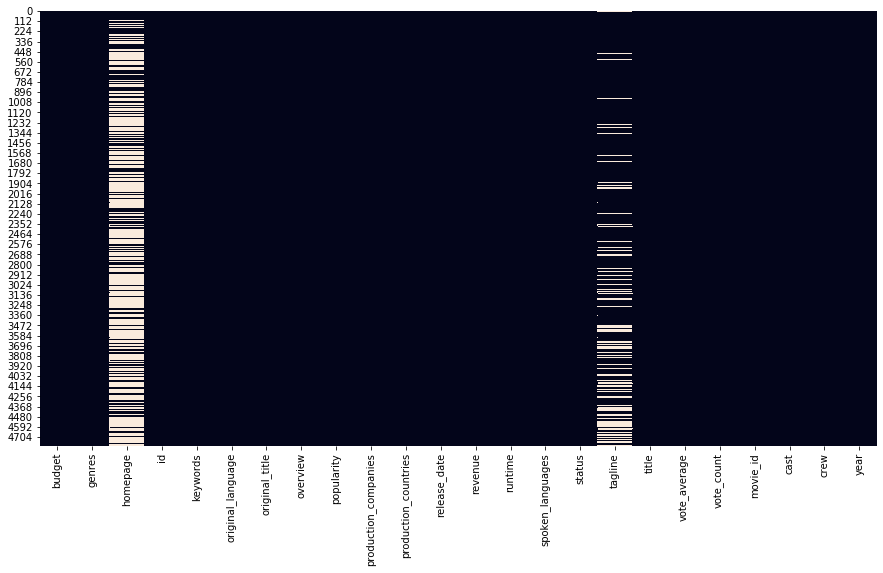

In [10]:
plt.figure(figsize = (15,8))
sns.heatmap(movies.isnull() , cbar = False)

In [11]:
high_missing = missing[missing > 500].index 
movies.drop(high_missing , axis = 1 , inplace = True)
print(high_missing)
print(movies.shape)
missing_rows_sum = movies.isnull().sum()
missing_rows = movies.isnull()
print(missing_rows_sum.sum())
missing_rows.sum(axis = 1)

Index(['homepage', 'tagline'], dtype='object')
(4803, 22)
7


0       0
1       0
2       0
3       0
4       0
       ..
4798    0
4799    0
4800    0
4801    0
4802    0
Length: 4803, dtype: int64

In [12]:
missing_rows_totals = missing_rows.sum(axis = 1)
missing_rows_totals.describe()

count    4803.000000
mean        0.001457
std         0.052010
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
dtype: float64

In [13]:
movies.dropna(inplace = True)
missing_final = movies.isnull().sum()
print(missing_final.sum())
movies.shape

0


(4799, 22)

In [14]:
# functions 

def one_hot_encode_multilabel(df, column_name):
    
    mlb_series = df[column_name].apply(lambda x: ','.join(x))
    
    
    mlb_df = mlb_series.str.get_dummies(sep=',')
    
    return mlb_df

def one_hot_encode_multilabel_original_language(df, column_name):
    
    mlb_series = df[column_name].apply(lambda x: ''.join(x))
    
    
    mlb_df = mlb_series.str.get_dummies(sep=',')
    
    return mlb_df


genres = one_hot_encode_multilabel(movies , "genres")
countries = one_hot_encode_multilabel(movies , "production_countries")
language = one_hot_encode_multilabel_original_language(movies , "original_language")

encoded_features = pd.concat([genres , language ,  countries], axis=1)

encoded_features


,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Sweden,Switzerland,Taiwan,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America
0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4799,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4800,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
print(countries.shape , genres.shape , language.shape )

(4799, 88) (4799, 20) (4799, 37)


In [16]:
encoded_features["movie_id"] = movies["movie_id"]
encoded_features.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Switzerland,Taiwan,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America,movie_id
0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,19995
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,285
2,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,206647
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,49026
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,49529


In [17]:
#import random
#input_movies_name = []
#input_movies_ratings = []
#input_movies_id = []

#for i in range(0,10) :
    #numb = random.randint(0,4799)
    #name = movies["original_title"].iloc[numb]
    #ratings = movies["vote_average"].iloc[numb]
    #movie_id = movies["movie_id"].iloc[numb]
    #input_movies_name.append(name)
    #input_movies_ratings.append(ratings)
    #input_movies_id.append(movie_id)
    
#user_input = {
    #"title" : input_movies_name , 
    #"ratings" : input_movies_ratings ,
    #"movie_id" : input_movies_id
#}
#input_movies = pd.DataFrame(user_input)
#input_movies

In [18]:
title = ['Harry Potter and the Prisoner of Azkaban', 'Half Baked',
       'The Chronicles of Riddick', 'Love Jones', 'My Name Is Khan',
       'The Bad Lieutenant: Port of Call - New Orleans', 'Chill Factor',
       'Aliens', 'Little Miss Sunshine', 'The Butterfly Effect'] 

Movie_id  = [673,9490,2789,27322,26022,11699,2162,679,773,1954] 
Ratings = [8,6.5,6,7,8,6.1,5,7.8,7.6,6.9]

In [19]:
user = {
    "movie_id" : Movie_id,
    "title" : title , 
    "rating" : Ratings   
}

input_user_data = pd.DataFrame(user)
input_user_data.head(10)

,movie_id,title,rating
0,673,Harry Potter and the Prisoner of Azkaban,8.0
1,9490,Half Baked,6.5
2,2789,The Chronicles of Riddick,6.0
3,27322,Love Jones,7.0
4,26022,My Name Is Khan,8.0
5,11699,The Bad Lieutenant: Port of Call - New Orleans,6.1
6,2162,Chill Factor,5.0
7,679,Aliens,7.8
8,773,Little Miss Sunshine,7.6
9,1954,The Butterfly Effect,6.9


In [20]:
input_id = movies[movies["original_title"].isin(input_user_data["title"].tolist())]
input_user_data = pd.merge(input_id , input_user_data )
input_user_data

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,spoken_languages,status,title,vote_average,vote_count,movie_id,cast,crew,year,rating
0,130000000,"[Adventure, Fantasy, Family]",673,"[flying, traitor, magic, cutting the cord, chi...",en,Harry Potter and the Prisoner of Azkaban,"Harry, Ron and Hermione return to Hogwarts for...",79.679601,"[1492 Pictures, Heyday films, Warner Bros.]","[United Kingdom, United States of America]",...,[English],Released,Harry Potter and the Prisoner of Azkaban,7.7,5877,673,"[Daniel Radcliffe, Rupert Grint, Emma Watson, ...","[John Williams, Jina Jay, Richard Beggs, Steph...",2004.0,8.0
1,105000000,"[Action, Science Fiction]",2789,"[prison, dystopia, matter of life and death, o...",en,The Chronicles of Riddick,After years of outrunning ruthless bounty hunt...,27.835436,"[One Race Films, Radar Pictures]",[United States of America],...,[English],Released,The Chronicles of Riddick,6.3,1570,2789,"[Vin Diesel, Thandie Newton, Karl Urban, Colm ...","[Harry Cohen, Adrian Gorton, Mary Selway, Scot...",2004.0,6.0
2,70000000,"[Action, Comedy, Thriller]",2162,[],en,Chill Factor,A store clerk and an ice cream truck driver ar...,3.276912,"[Warner Bros., Morgan Creek Productions]",[United States of America],...,[English],Released,Chill Factor,5.3,29,2162,"[Cuba Gooding Jr., Skeet Ulrich, Peter Firth, ...","[Hans Zimmer, James G. Robinson, John Powell, ...",1999.0,5.0
3,25000000,"[Drama, Crime]",11699,"[police brutality, organized crime, policeman,...",en,The Bad Lieutenant: Port of Call - New Orleans,"Terrence McDonagh, a New Orleans Police sergea...",17.339852,"[Saturn Films, Nu Image Films, Edward R. Press...",[United States of America],...,"[Español, English]",Released,The Bad Lieutenant: Port of Call - New Orleans,6.0,326,11699,"[Nicolas Cage, Eva Mendes, Val Kilmer, Fairuza...","[Johanna Ray, Nicolas Cage, Mark Isham, Walter...",2009.0,6.1
4,18500000,"[Horror, Action, Thriller, Science Fiction]",679,"[android, extraterrestrial technology, space m...",en,Aliens,When Ripley's lifepod is found by a salvage cr...,67.660940,"[Twentieth Century Fox Film Corporation, SLM P...","[United Kingdom, United States of America]",...,[English],Released,Aliens,7.7,3220,679,"[Sigourney Weaver, Michael Biehn, James Remar,...","[Michael Lamont, Ray Lovejoy, Robin Clarke, Ja...",1986.0,7.8
5,13000000,"[Science Fiction, Thriller]",1954,"[amnesia, chaos theory, blackout, time travel,...",en,The Butterfly Effect,A young man struggles to access sublimated chi...,73.307513,"[New Line Cinema, FilmEngine, Katalyst Films, ...","[Canada, United States of America]",...,[English],Released,The Butterfly Effect,7.3,2060,1954,"[Ashton Kutcher, Melora Walters, Amy Smart, El...","[Chris Bender, Matthew F. Leonetti, Heike Bran...",2004.0,6.9
6,10000000,"[Comedy, Drama, Romance]",27322,"[sex, ex-boyfriend, independent film, african ...",en,Love Jones,Darius Lovehall is a young black poet in Chica...,1.000178,"[New Line Cinema, Addis Wechsler Pictures]",[United States of America],...,[English],Released,Love Jones,8.1,12,27322,"[Larenz Tate, Nia Long, Isaiah Washington, Bil...","[Theodore Witcher, Theodore Witcher]",1997.0,7.0
7,12000000,"[Drama, Romance]",26022,[bollywood],en,My Name Is Khan,"Rizwan Khan, a Muslim from the Borivali sectio...",14.719886,"[Fox Searchlight Pictures, Red Chillies Entert...","[India, United States of America]",...,"[English, हिन्दी, اردو]",Released,My Name Is Khan,7.7,232,26022,"[Shah Rukh Khan, Kajol, Jimmy Shergill, Zarina...","[Shah Rukh Khan, Sharmishta Roy, Karan Johar, ...",2010.0,8.0
8,8000000,"[Comedy, Drama]",773,"[california, brother sister relationship, wife...",en,Little Miss Sunshine,"A family loaded with quirky, colorful characte...",14.793177,"[Fox Searchlight Pictures, Bona Fide Productio...",[United States of America],...,[English],Released,Little Miss Sunshine,7.5,1686,773,"[Greg Kinnear, Toni Collette, Steve Carell, Pa...","

In [21]:
user_encoded_features = encoded_features[encoded_features["movie_id"].isin(input_user_data["movie_id"].tolist())]

In [22]:
user_encoded_features

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Switzerland,Taiwan,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America,movie_id
191,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,1,673
223,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2789
1469,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2162
1946,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,11699
2403,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,679
2743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1954
3041,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,27322
3223,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,26022
3238,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,773
3255,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,9490


In [23]:
user_encoded_features  =  user_encoded_features.reset_index(drop=True)
user_encoded_features  =  user_encoded_features.drop("movie_id" , axis = 1)
user_encoded_features.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Sweden,Switzerland,Taiwan,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America
0,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [24]:
user_encoded_features.shape

(10, 145)

In [25]:
user_profile = user_encoded_features.transpose().dot(input_user_data["rating"])
user_profile.head(20)

Action             18.8
Adventure           8.0
Animation           0.0
Comedy             26.1
Crime              12.6
Documentary         0.0
Drama              28.7
Family              8.0
Fantasy             8.0
Foreign             0.0
History             0.0
Horror              7.8
Music               0.0
Mystery             0.0
Romance            15.0
Science Fiction    20.7
TV Movie            0.0
Thriller           19.7
War                 0.0
Western             0.0
dtype: float64

In [26]:
recommendation_table = (( encoded_features * user_profile ).sum(axis=1))/(user_profile.sum())
recommendation_table

0       0.611582
1       0.504826
2       0.564493
3       0.636443
4       0.541971
          ...   
4798    0.350980
4799    0.321732
4800    0.607195
4801    0.403042
4802    0.403042
Length: 4799, dtype: float64

In [27]:
max(recommendation_table)

0.7598713073998244

In [28]:
scores = recommendation_table.values
threshold = max(scores) - 0.2
Final = []
for i in range(len(scores)) :
    if scores[i] >= threshold :
        title = "recommendation"
        Final.append(title)
    
    if scores[i] <= threshold :
        title = "not_recommendation"
        Final.append(title)

In [29]:
recommended = [score for score in scores if score > threshold]
not_recommended = [score for score in scores if score <= threshold]
num_recommended = len(recommended)
num_not_recommended = len(not_recommended)
num_recommended, num_not_recommended

(1418, 3381)

In [30]:
movies["final_rating"] = scores
movies["Final opinion"] = Final

In [31]:
movies_table_1 = movies.drop(['keywords', 'original_language', 'original_title',
       'overview', 'popularity', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'vote_count', 'cast', 'crew', "movie_id"] , axis = 1)

In [32]:
sorted_df = movies_table_1.sort_values(by='final_rating', ascending=False)
sorted_df.head(10)

,budget,genres,id,production_companies,production_countries,title,vote_average,year,final_rating,Final opinion
2442,17000000,"[Action, Adventure, Comedy, Drama, Science Fic...",4723,"[Universal Pictures, Destination Films, Persis...","[Germany, United States of America, France]",Southland Tales,5.2,2006.0,0.759871,recommendation
1626,0,"[Fantasy, Drama, Action, Comedy, Crime, Scienc...",4474,"[Regency Enterprises, New Regency Pictures, Pa...",[United States of America],My Super Ex-Girlfriend,4.8,2006.0,0.739105,recommendation
922,50000000,"[Action, Adventure, Drama, Mystery, Science Fi...",13811,"[Summit Entertainment, Mystery Clock Cinema, E...","[United Kingdom, United States of America, Aus...",Knowing,5.9,2009.0,0.729746,recommendation
3819,3500000,"[Drama, Action, Comedy, Crime]",34769,"[Alliance Films, Darius Films, Insight Film Re...","[Canada, United Kingdom, United States of Amer...",Defendor,6.5,2009.0,0.721556,recommendation
807,56000000,"[Action, Comedy, Drama, Family, Thriller]",10022,"[Walt Disney Pictures, Spyglass Entertainment]","[Canada, United States of America]",The Pacifier,5.8,2005.0,0.719509,recommendation
370,90000000,"[Action, Adventure, Comedy, Crime, Mystery, Th...",291805,"[Summit Entertainment, Lionsgate, K/O Paper Pr...","[Canada, China, United Kingdom, United States ...",Now You See Me 2,6.7,2016.0,0.718631,recommendation
3040,10000000,"[Action, Comedy, Crime, Drama, Thriller]",9515,[Miramax Films],"[Germany, United States of America]",The Matador,6.2,2005.0,0.712782,recommendation
2827,12000000,"[Action, Adventure, Comedy, Drama, Family, Mus...",17130,"[Paramount Pictures, MTV Films]",[United States of America],Crossroads,4.7,2002.0,0.708979,recommendation
510,76000000,"[Drama, Action, Thriller, Science Fiction]",9693,"[Universal Pictures, Strike Entertainment, Hit...","[United Kingdom, United States of America]",Children of Men,7.4,2006.0,0.706347,recommendation
3668,5000000,"[Drama, Action, Thriller, Science Fiction]",11935,"[Associated General Films, Incorporated Televi...","[United Kingdom, United States of America]",Capricorn One,6.4,1977.0,0.706347,recommendation


In [33]:
recommendation_table_sorted = recommendation_table.sort_values(ascending=False)
recommendation_table_sorted

2442    0.759871
1626    0.739105
922     0.729746
3819    0.721556
807     0.719509
          ...   
4066    0.022814
3189    0.022814
2370    0.000000
1730    0.000000
4672    0.000000
Length: 4799, dtype: float64

In [34]:
encoded_features["final_rating"] = scores
encoded_features["Final opinion"] = Final
encoded_features = encoded_features.drop(["movie_id"] ,axis = 1 )

In [35]:
encoded_features.head(10)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Taiwan,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America,final_rating,Final opinion
0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0.611582,recommendation
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0.504826,not_recommendation
2,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0.564493,recommendation
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0.636443,recommendation
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.541971,not_recommendation
5,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0.504826,not_recommendation
6,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0.426440,not_recommendation
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.541971,not_recommendation
8,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0.519450,not_recommendation
9,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0.504826,not_recommendation


In [36]:
X = encoded_features.drop(["final_rating" , "Final opinion"] , axis = 1)
y = encoded_features["Final opinion"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print(accuracy, report)

0.9916666666666667                     precision    recall  f1-score   support

not_recommendation       0.99      1.00      0.99      1024
    recommendation       0.99      0.98      0.99       416

          accuracy                           0.99      1440
         macro avg       0.99      0.99      0.99      1440
      weighted avg       0.99      0.99      0.99      1440



### 40221550004